# Image Filter : Gaussian Filter

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import lena
from scipy.ndimage.filters import convolve
import scipy.ndimage as nd

<matplotlib.colorbar.Colorbar instance at 0x0D965710>

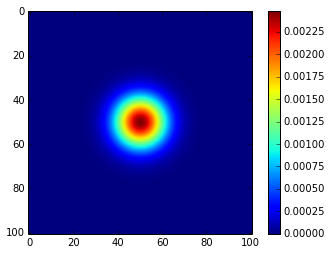

In [27]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 8)
plt.imshow(gauss_kernel)
plt.colorbar()

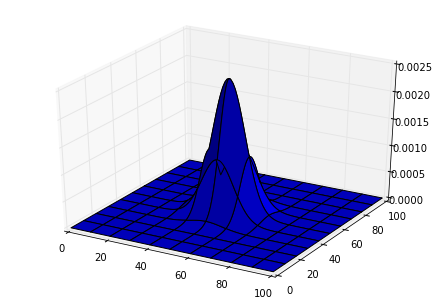

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig) # create a 3D model
x, y = np.mgrid[0:101, 0:101]
ax.plot_surface(x,y,gauss_kernel)
fig.add_axes(ax)

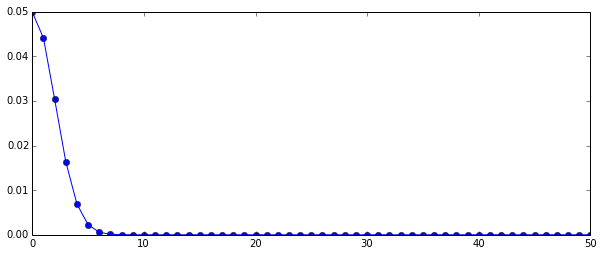

In [21]:
plt.plot(abs(np.fft.rfft(gauss_kernel[:,50])), 'o-') # real fft
plt.gcf().set_figwidth(10)

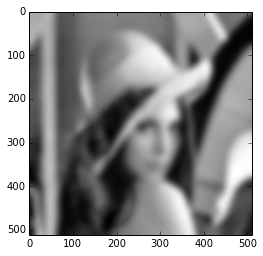

In [22]:
src_image = lena()
gauss_blur = convolve(src_image, gauss_kernel)
plt.imshow(gauss_blur, cmap=plt.cm.gray)

## Q1: 查詢rfft的定義後，想辦法得到下圖(low-pass filter)。
    hint: 1. n=512
          2. 紅色曲線為rttf的角度
          3. plt.twinx()將兩個曲線畫在同一張圖上
          4. plt.plot(..., 'r') 畫曲線為紅色
<img src="rfft.png">

## Q2: 如何得到下面的結果?
    hint: sigma=20
<img src="gaussian.png">

# Image Filter : Median Filter

In [28]:
def imshow2(image):
    plt.imshow(image, cmap=plt.cm.gray)

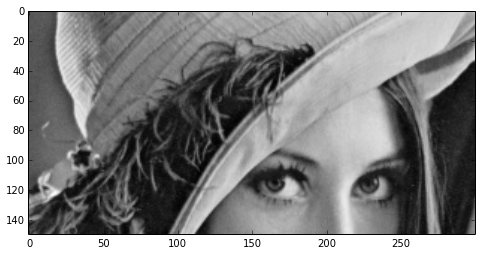

In [63]:
src_image_eyes = src_image[150:300, 100:400]
imshow2(src_image_eyes)
plt.gcf().set_figwidth(10)

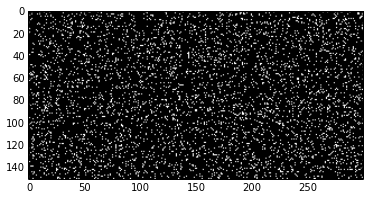

In [55]:
noise = np.where(np.random.random(src_image_eyes.shape) > 0.9, 0.5, 0)
imshow2(noise)

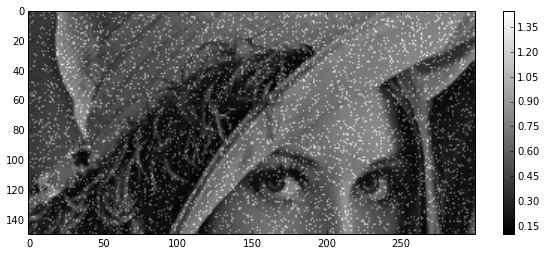

In [65]:
noisy_image = (src_image_eyes/255.0) + noise
imshow2(noisy_image)
plt.colorbar()
plt.gcf().set_figwidth(10)

## Q3: 查詢midian定義後，利用原影像呈現下圖。
    hint: 1. 使用方法類似gaussian filter
          2. size=10
<img src="meye.png">

## Q4: 利用gaussian filter來處理"雜訊影像"得到下面的結果。
    hint: simga依序為1, 3, 5
<img src="gnoise.png">

## Q5: 改使用median filter來處理"雜訊影像"得到下面的結果。
    hint: size依序為1, 3, 5
<img src="mnoise.png">